# MINI Project 1

## Before you start
Read the following instructions carefully.

- Prerequisite: `functions`, `lists`, `dictionaries`
- New concepts: `cvs`, `matplotlib`, `pytest`. In order to learn these packages, you need go through the examples via the links in this file.
- Estimated working time: 10 hours
- Work procedure: This is an individual work, __you are expected to write your own code, and you must be able to explain it in your own words__.
- Examination: you must present your solution to tasks **A, B and C** __individually__ to a teacher or assistant teacher according the time at the course home page.
- Optional Tasks: Optional tasks are non-mandatory, but they will _help you to get higher grade in the final exam_.
- The data provided in this lesson comes from the [World Bank](https://data.worldbank.org/) and [Gapminder](https://www.gapminder.org/). There are many more datasets available there and you're welcome to explore them and try them out!

# I. Importing data

Data can have many formats (`.xls`, `.json`, `.txt`, ...). The `.csv` format is one of the most simple, portable and popular format. `.csv` data files can be read easily using the [csv](https://docs.python.org/3/library/csv.html#module-csv) module.

## Loading CSV data

Loading data in CSV files into your Python script can be done as the example shown in [Lecture 4](http://www.it.uu.se/edu/course/homepage/prog1/english/index.html/LectureNotes/Lecture4.html#/3/6).

Other examples can be found in the official Python documentations.


## Pre-processing
The most straightforward way to import csv-data is to create a table (that is, a list of lists). However, it is often not the most convenient way to handle this data as it requires to go through the whole table when searching for a specific element. Dictionaries are often a much better alternative.

**Note**: The first row of the CSV file usually contains the header/names of each column, which need to treated seperately. 


## **Mandatory Tasks A:**
1. Download the file [**`CO2Emissions_filtered.csv`**](./CO2Emissions_filtered.csv) from the course website. If necessary, open it in a spreadsheet program (e.g. Excel, Numbers, Sheets, depending on the OS) to grasp how the data is structured. Write a function `load_csv(filename)` that takes a string `filename` as argument and returns a dictionary that takes the country code (all in the **lowercases**) as the key and the list of yearly CO2 emission history as the value. 

__Tip__: similar to `list`-comprehensions, `dict`-comprehensions can be used to neatly build dictionaries!

#### Example:
```python
l = [
    ['a', '10', '9'],
    ['C', '-8', '0'],
    ['P', '4', '2']
]

d  = {v[0]: v[1:] for v in l}

print(d)
```

```
> {'a': ['10', '9'], 'C': ['-8', '0'], 'P': ['4', '2']}
```

**Remark 1**: The data loaded from CSV are `string` type, it would be better to convert and save the numbers to `float` type in the list for future use. The easy ways to convert a list of `string` to a list of `float` is to use the `list`-comprehensions or `map()` function, for example
``` python
strList = ['321','5433', '11']
# Use list comprehension
floatListComp = [float(s) for s in strList]
# Use map() function
floatListMap = list(map(float, strList))
```
**Remark 2**: The counrty codes in `CO2Emissions_filtered.csv` are originally in the uppercases. In order to use it with the other data in this MINI project, you have to convert them to the lowercases. You can do this during the `dict`-comprehensions with the function `lower()`, see the [official document](https://docs.python.org/3.8/library/stdtypes.html#str.lower) and search on the internet to find how to use it.

_Optional Task: Try to do the type conversion while loading the data from the csv file into the dictionary. This can be done in one line of code. You might need to use both `list`- and `dict`-comprehensions._

# II. Presenting Data

[Matplotlib](https://matplotlib.org/) is the most popular Python module for plotting. 
It offers many customization options, and similar plotting functionnalities as Matlab. 

You might need to install this module on your computer, the installation instruction is [here](https://matplotlib.org/faq/installing_faq.html#installation).
_If there is any problem with the installation, do not hesitate to ask the teacher._

Official examples of `matplotlib` are available [here](https://matplotlib.org/tutorials/introductory/sample_plots.html) and [there](https://matplotlib.org/gallery/index.html).

 

## Two dimensional data
Let us take a closer look at one of the examples provided in [Lecture 4](http://www.it.uu.se/edu/course/homepage/prog1/english/index.html/LectureNotes/Lecture4.html#/4/1)
```python
import matplotlib.pyplot as plt
from math import pi,sin

# Data for plotting
L = 100
time = list(range(L))
Voltage = [sin(2*pi*t/L) for t in time]

fig, ax = plt.subplots()
ax.plot(time, Voltage)

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Example 1')
ax.grid()

fig.savefig("test.png")
plt.show()

```

* `import matplotlib.pyplot as plt` to use the plot functions from `matplotlib` module and rename it to `plt`.
* `fig, ax = plt.subplots` sets up the figure's frame.
* `ax.plot(time, Voltage)` plots the the data contained in `time` and `Voltage`. These are `lists`, but can also be 'arraies', which will be covered later during the course.
* `ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Example 1')` sets the labels for each axis, as well as the title of the figure.
* `ax.grid()` turns on the grid in the figure, useful when you need to read values from the curve.
* `fig.savefig("test.png")` saves the figure to a `.png` files. `Matplotlib` supports many other formats. In particular, it supports vector graphics (`.pdf`, `.eps`, `.svg`), which are usually of better quality than bitmap formats (`.png` and `.jpg`).
* `plt.show()` displays the figure in a new window.

__Tip__: The most common way to learn `matplotlib` is through sample codes. It is __important__ that you try some of the examples before you move on to your own project. 

## **Mandatory Tasks B**:
1. Use the dictionary you created in Part A and plot the data of the five nordic countries (Denmark, Finland, Iceland, Norway and Sweden) __from 1960 to 2014__. The country codes are `'dnk', 'fin', 'isl', 'nor', 'swe'`, correspondingly. You can define the time in a list as `time = list(range(1960, 2015))`. You should see some variations, or noise, in the data. 
2. The noise can be removed by smoothing the data using the two smoothing functions you wrote in lesson 6, namely `smooth_a` and `smooth_b`. Indeed, there is a neat way to implement these functions using only list comprehension:
    * For `smooth_a`, start by extending the list on both sides with the first and the last element of the original list. This can be done using the concatenation operator (`+`) and the repetition operator (`*`) on lists (if needed, make a copy of the original list). Use the newly extended list to compute the smoothed list, using list comprehension.
    * For `smooth_b`, we need to enforce that the starting and ending indices of the slice are always between 0 and the length of the original list. This can be done using the `min` and `max` functions.
    
  Implement *both* `smooth_a` and `smooth_b` using only list-comprehensions (no `if`-statments, no `while`-loops, no `for`-loops and the code should be very short, the code should be less than 5 lines for each function). **You should use you own code, not copy the examples given by the teacher.**

2. Use the `smooth_a` and `smooth_b` functions to smooth the data over a period of 11 years, which means 5 data points on each side. Plot the results after `smooth_a` in __solid lines__, `smooth_b` in __dashed lines__, and the original data using __dotted lines__ for all the five countries. To distinguish different countries, use different colors, but use the same color for the same country. An __example__ of the result is as shown below, but _feel free to choose any color maps you like._

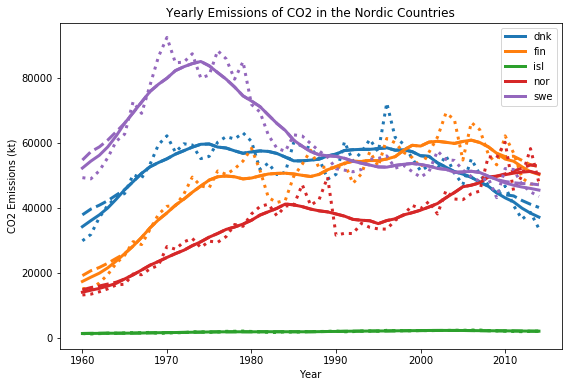

In [6]:
%run plot2D.py

## Plot data higher than two dimensions
Data has higher than two dimensions can often be visualized using scatter plots in 2D. Let's look at another example from [Lecture 4](http://www.it.uu.se/edu/course/homepage/prog1/english/index.html/LectureNotes/Lecture4.html#/4/5):

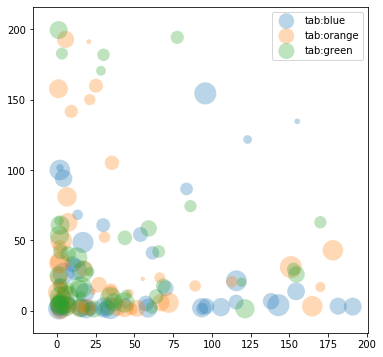

In [2]:
import matplotlib.pyplot as plt
import random

random.seed(20191126)
fig, ax = plt.subplots(figsize=(6, 6))
N = 50
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    x = [200**random.random() for i in range(N)]
    y = [200**random.random() for i in range(N)]
    scale = [500*random.random() for i in range(N)]
    ax.scatter(x, y, s=scale, c=color, label=color, alpha=0.3, edgecolors='none')

ax.legend()
plt.show()

Here, the data is actually four dimensional: coordinate `x`, coordinate `y`, `color` and `scale`.
The coordinates are random numbers between 0 and 200 with some exponential distributions. 
The size of each point is also set randomly between 0 and 200. 

`ax.scatter(x, y, c=color, s=scale, label=color, alpha=0.3, edgecolors='none')` is the most relevant part of this code, it takes the `x` and `y` coordinates of the data as first and second arguments, respectively. 
It also the `color` (using the `c` optional argument) and  the `size` (the `scale` optional argument).
The argument `alpha` between 0 to 1 is the transparency level.

## **Mandatory Tasks C**:
1. Download the file [**`population.csv`**](./population.csv). Import it with your `import_csv()` function and, as a sanity check, plot the population of Bolivia, Venezuela, Chile, Ecuador and Paraguay. Add x- and y- labels, a title, and a legend.
2. Data often comes from different sources therefore have different format, or missing elements. In this condition, when dealing with different sources, it is necessary to reformat the data. Here the two datasets `CO2Emissions_filtered.csv` and `population.csv` do not contain the same countries (some countries were removed from the first data set because of missing data for the whole period 1960-2014). Write a function `intersection(list_1, list_2)`, for the lists of country codes from the two datasets, return the country codes which are *both* in `list_1` and `list_2`. If necessary, write some tests with `pytest` to convince yourself that your function is working properly.
  
 **Example:**
```python
intersection(['fra', 'deu', 'ita', 'nld', 'lux'], ['bel', 'ita', 'fra', 'nld'])
```
```
> ['fra', 'ita', 'nld']
```
3. Create a scatter plot showing population vs. CO2 emission at year 2014, for **all** countries available in **both** datasets, ideally you should have 141 countries. 
4. Use a `log-log` scale to plot, add x- and y- labels and a title. Annotate every data point with its country code. An example of the figure is shown as following.

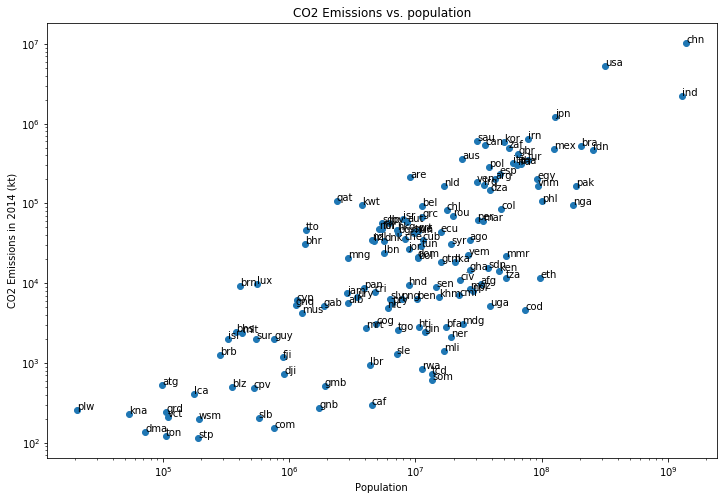

In [3]:
%run plotScatter.py

## Optional Tasks

5. It is not really informative to have the figure as above, maybe you want to add some more information. For instance, use different colors for the countries from different continents. The continent codes is in the data file [**`country_continent.csv`**](./country_continent.csv). A example of the figure is shown as following.

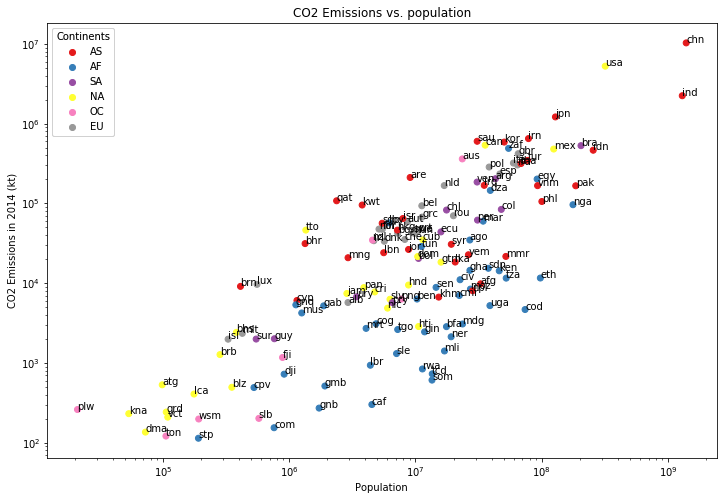

In [4]:
%run plotScatterContinent.py

6. You can definately do more! Color all points according to the changes(positive value for increase) in CO2 emissions from 1994 to 2014 (use `coolwarm` as colormap). Because some countries (China, the US, and India for instance) have increased their emission tremendously more than others, it is difficult to see differences between all the other countries. `scatter` can take two optional parameters to set the range of the colormap, that is `vmin` and `vmax`. Adjust the colormap to fix this issue. An example of the output is shown below.

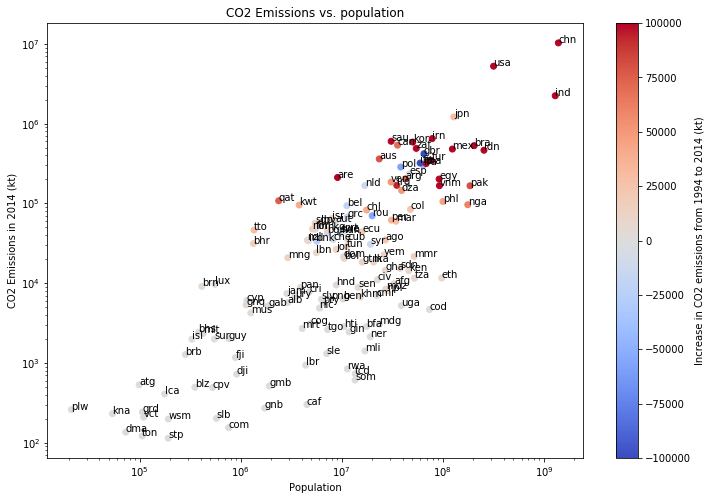

In [5]:
%run plotScatterDiff.py